## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule

50000/50000 [==============================] - 2s 46us/step - loss: 1.3335 - acc: 0.5198 - val_loss: 1.5658 - val_acc: 0.4579
Epoch 33/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3201 - acc: 0.5282 - val_loss: 1.5017 - val_acc: 0.4680
Epoch 34/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3017 - acc: 0.5319 - val_loss: 1.5603 - val_acc: 0.4580
Epoch 35/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.2835 - acc: 0.5395 - val_loss: 1.5865 - val_acc: 0.4487
Epoch 36/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.2845 - acc: 0.5379 - val_loss: 1.5525 - val_acc: 0.4679
Epoch 37/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.2668 - acc: 0.5432 - val_loss: 1.5265 - val_acc: 0.4718
Epoch 38/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.2526 - acc: 0.5501 - val_loss: 1.4918 - val_acc: 0.4841
Epoch 39/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 0.8382 - acc: 0.7047 - val_loss: 1.5806 - val_acc: 0.5039
Epoch 34/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.8233 - acc: 0.7084 - val_loss: 1.5456 - val_acc: 0.5044
Epoch 35/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.8051 - acc: 0.7175 - val_loss: 1.4824 - val_acc: 0.5208
Epoch 36/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.7855 - acc: 0.7239 - val_loss: 1.4640 - val_acc: 0.5320
Epoch 37/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.7652 - acc: 0.7313 - val_loss: 1.6994 - val_acc: 0.4860
Epoch 38/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.7470 - acc: 0.7378 - val_loss: 1.5082 - val_acc: 0.5247
Epoch 39/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.7313 - acc: 0.7426 - val_loss: 1.5263 - val_acc: 0.5258
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 1.3831 - acc: 0.5139 - val_loss: 1.4452 - val_acc: 0.4893
Epoch 35/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3760 - acc: 0.5158 - val_loss: 1.4823 - val_acc: 0.4698
Epoch 36/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3674 - acc: 0.5195 - val_loss: 1.4519 - val_acc: 0.4847
Epoch 37/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3594 - acc: 0.5232 - val_loss: 1.4233 - val_acc: 0.4941
Epoch 38/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3529 - acc: 0.5269 - val_loss: 1.4158 - val_acc: 0.4953
Epoch 39/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3441 - acc: 0.5264 - val_loss: 1.4323 - val_acc: 0.4858
Epoch 40/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3383 - acc: 0.5317 - val_loss: 1.4076 - val_acc: 0.4991
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 47us/step - loss: 1.8099 - acc: 0.3698 - val_loss: 1.8112 - val_acc: 0.3696
Epoch 36/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8059 - acc: 0.3717 - val_loss: 1.8077 - val_acc: 0.3730
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8022 - acc: 0.3727 - val_loss: 1.8038 - val_acc: 0.3719
Epoch 38/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7985 - acc: 0.3752 - val_loss: 1.8001 - val_acc: 0.3715
Epoch 39/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7947 - acc: 0.3759 - val_loss: 1.7966 - val_acc: 0.3745
Epoch 40/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7910 - acc: 0.3778 - val_loss: 1.7930 - val_acc: 0.3773
Epoch 41/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7875 - acc: 0.3784 - val_loss: 1.7897 - val_acc: 0.3773
Epoch 42/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 2.1701 - acc: 0.2449 - val_loss: 2.1676 - val_acc: 0.2469
Epoch 37/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1672 - acc: 0.2456 - val_loss: 2.1646 - val_acc: 0.2479
Epoch 38/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.1643 - acc: 0.2462 - val_loss: 2.1617 - val_acc: 0.2498
Epoch 39/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.1614 - acc: 0.2471 - val_loss: 2.1589 - val_acc: 0.2506
Epoch 40/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.1585 - acc: 0.2484 - val_loss: 2.1560 - val_acc: 0.2522
Epoch 41/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.1557 - acc: 0.2498 - val_loss: 2.1531 - val_acc: 0.2553
Epoch 42/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.1528 - acc: 0.2506 - val_loss: 2.1503 - val_acc: 0.2554
Epoch 43/50
50000/50000 [=====================

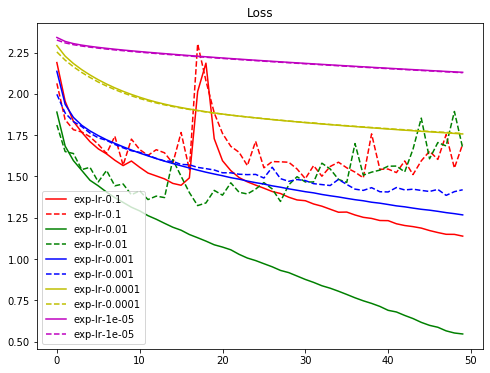

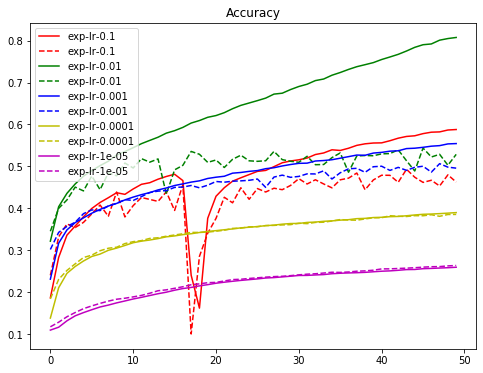

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()